In [1]:
# https://www.empiwifo.uni-freiburg.de/teaching/winter-term-10-11/materialien-portfolio-analysis/pca.pdf

In [2]:
# https://medium.com/@andymdc31/using-pca-in-a-machine-learning-pipeline-b6fe3492b1b9


![](https://miro.medium.com/max/1084/1*tfG0aKhb9RiawtH2rB-TvA.gif)

$$\large \text{PCA تحليل المكونات الرئيسية    }$$


-   تعلم في غياب الاشراف : منهجية استخلاص البيانات ذات تباين من مصفوفة ذات ابعاد عالية

- عملية اسقاط عمودي يتم من خلالها تحويل البيانات إلى مصفوفة ذات ابعاد أقل من مصفوفة البيانات الأصلية مع تباين أكبر.

In [12]:
# تحميل المكتبات
import pandas as pd
import numpy as np
from sklearn import datasets
# تحميل البيانات
X, y = datasets.load_digits(return_X_y=True)

In [4]:
# حجم مصفوفة البيانات
X.shape

(1797, 64)

In [5]:
# نموذج بيانات
X[100] , y[100]

(array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
        15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
         0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]),
 np.int64(4))

Text(0.5, 1.0, '4')

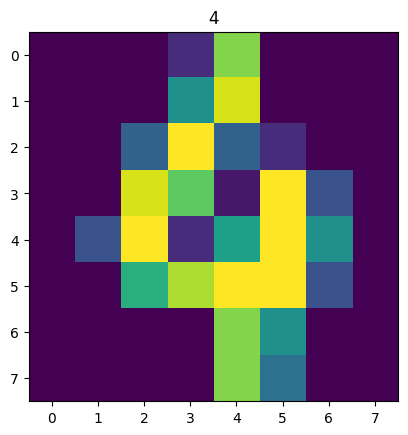

In [6]:
# رسم محتوى احدى المصفوفات
import matplotlib.pyplot as plt
# تغيير ابعاد مصفوفة السجل
plt.imshow(X[100].reshape(8,8))
plt.title(y[100])

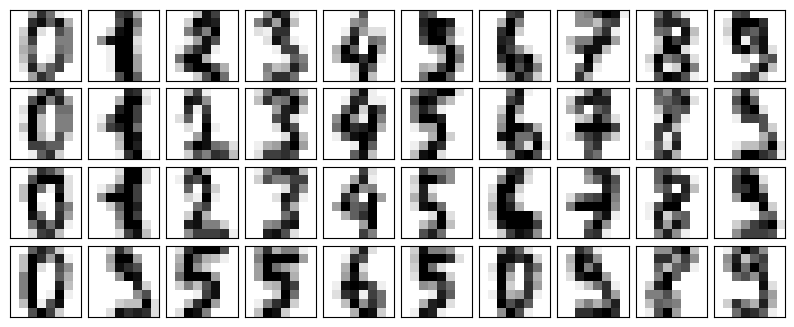

In [7]:
# اظهار محتوى قاعدة البيانات للأرقام
def plot_digits(data):
    fig, ax = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, g in enumerate(ax.flat):
        g.imshow(X[i].reshape(8, 8),
                  cmap='binary' , interpolation='nearest',
                  clim=(0, 16))
plot_digits(X)

# تقليص الابعاد
![](https://notsquirrel.com/assets/img/pca/flatten.gif)

-  معالجة سجلات البيانات

![](https://notsquirrel.com/assets/img/pca/twostack.gif)

# <h2  dir="rtl">معالجة تقليص البيانات من خلال تركيبة خوارزمية تكرارية</h2>

In [8]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=4).fit(X)  # Create a PCA object with 4 components and fit it to the data (X)
                                    # - PCA: Principal Component Analysis, a dimensionality reduction technique
                                    # - n_components=4: Reduce the data to 4 principal components
                                    # - fit(X): Compute the principal components based on the input data X
                                    # - X: The input dataset (assumed to be a 2D array-like structure, e.g., numpy array)
                                    # - X_pca: The fitted PCA object, now containing the transformation info

X_pca.explained_variance_ratio_     # Access the explained variance ratio attribute of the fitted PCA object
                                    # - explained_variance_ratio_: An array of length n_components (here, 4)
                                    # - Each value represents the proportion of the dataset's variance explained by
                                    #   the corresponding principal component
                                    # - Example output: [0.4, 0.3, 0.2, 0.1] means the 1st component explains 40% of variance,
                                    #   the 2nd 30%, etc., summing to a value ≤ 1

array([0.14890594, 0.13618771, 0.11794594, 0.08409979])

In [9]:
PCA(n_components=4).fit_transform(X) # Transform the input data X into the 4-dimensional space defined by the PCA object
                                    # - fit_transform(X): Transform the input data X using the fitted PCA object
                                    # - X: The input dataset (assumed to be a 2D array-like structure, e.g., numpy array)
                                    # - Output: A 2D array-like structure containing the transformed data   

array([[ -1.25946645, -21.27488348,   9.46305462, -13.01418869],
       [  7.9576113 ,  20.76869896,  -4.43950604,  14.89366444],
       [  6.99192297,   9.95598641,  -2.95855808,  12.28830243],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453,   7.22773348],
       [ -4.87210009, -12.42395362,  10.17086635,   6.66885049],
       [ -0.34438963,  -6.36554919, -10.77370849,   7.72621321]])

In [13]:
np.geomspace(2,64, 6)

array([ 2.,  4.,  8., 16., 32., 64.])

In [14]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np

for n, c in zip(np.geomspace(2,64, 6).astype("int") , np.logspace(-4, 4, 6)):
  X_pca = PCA(n_components=n).fit_transform(X)
  logreg=LogisticRegression(C=c, max_iter=1000, solver="liblinear")
  logreg.fit(X_pca, y)
  #print( f"{n:-<10}: {c} \n")
  #  تحديد درجة الدقة لكل عدد من الأعمدة التي تم تقليصها
  print(f" {n:_<5}  ,{c :-<20} Accuracy scored : {logreg.score(X_pca,y):.3}")


 2____  ,0.0001-------------- Accuracy scored : 0.449
 3____  ,0.003981071705534973 Accuracy scored : 0.622
 7____  ,0.15848931924611143- Accuracy scored : 0.866
 15___  ,6.309573444801943--- Accuracy scored : 0.957
 31___  ,251.18864315095823-- Accuracy scored : 0.99
 64___  ,10000.0------------- Accuracy scored : 0.999


In [15]:
import numpy as np
np.geomspace(2,64, 6).astype("int")

array([ 2,  3,  7, 15, 31, 64])

## PipeLine  توظيف معالجة متسلسلىة 

In [16]:
# نوظيف انحدار لوجستي لتحديد الرقم المطابق لكل رسمة 

from sklearn.pipeline import make_pipeline
pca=PCA()
model = make_pipeline(
    pca, 
    # max_iter  عدد مرات معالجة البيانات
    # tol  التوقف عند مستوى تباين لا يفوق 10%  فيما بين عرضين متتالين للبيانات
    # LogisticRegression(max_iter=100, tol=0.1)

    LogisticRegression(max_iter=100, tol=0.1)
)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.3)

In [18]:
X_train.shape

(1257, 64)

In [19]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
# تحديد معايير معالجة البيانات 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pca__n_components': [5, 15, 30, 45, 60],
    'logisticregression__C': np.logspace(-4, 4, 4),
    'logisticregression__solver':["liblinear"],
    'logisticregression__penalty':["l1", "l2"], 
    "logisticregression__max_iter":[500, 800, 1000]
}



In [20]:
# التاكد من تسمية المعايير أعلاه
model.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'pca', 'logisticregression', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__n_oversamples', 'pca__power_iteration_normalizer', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [21]:
# توظيف شبكة البحث لتحديد افضل معايير معالجة البيانات
search = GridSearchCV(model, param_grid, n_jobs=-1, refit=True  ) # n_jobs=-1 to use all available cores



In [22]:
# تدريب البيانت
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression(tol=0.1))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'logisticregression__max_iter': [500, 800, 1000],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear'],
                         'pca__n_components': [5, 15, 30, 45, 60]})

In [23]:
#grid.best_score_ is the average of all cv folds for a single combination of the parameters  specified  Accuracy  افضل نتيجة  تعكس الدقة في هذه الحال
f"Best parameter : {search.best_score_:.3}"  

'Best parameter : 0.948'

In [24]:
# أفضل المعايير 
print(search.best_params_)

{'logisticregression__C': np.float64(10000.0), 'logisticregression__max_iter': 500, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear', 'pca__n_components': 45}


In [25]:
#json  بنية افضل التقديرات 
search.best_estimator_.named_steps

{'pca': PCA(n_components=45),
 'logisticregression': LogisticRegression(C=np.float64(10000.0), max_iter=500, penalty='l1',
                    solver='liblinear', tol=0.1)}

In [26]:

search.best_estimator_.score(X_test, y_test)

0.9611111111111111

##رسم بياني لتطور درجة الدقة في ضوء تقليص ابعاد المصفوفة 



In [27]:
# تدريب 
pca.fit(X_train)

PCA()

In [28]:
# الأبعاد الأصلية
pca.n_components_

64

In [29]:
# نسبة تباين كل خاصية  في ضوء تغير أبعاد مصوفة الباينات
pca.explained_variance_ratio_ #.cumsum()

array([1.48700307e-01, 1.36312819e-01, 1.20076302e-01, 8.45954441e-02,
       5.63897588e-02, 4.92359652e-02, 4.26269512e-02, 3.56750500e-02,
       3.33886752e-02, 3.09762981e-02, 2.38644587e-02, 2.31836145e-02,
       1.84609017e-02, 1.76094833e-02, 1.49145715e-02, 1.44399060e-02,
       1.33425704e-02, 1.20314091e-02, 1.01825456e-02, 9.35663008e-03,
       8.86570197e-03, 7.94401834e-03, 7.38379622e-03, 7.21963027e-03,
       6.61666884e-03, 6.04174507e-03, 5.78109620e-03, 5.07542185e-03,
       4.80219522e-03, 4.25491178e-03, 3.85070610e-03, 3.49144303e-03,
       3.30020409e-03, 3.23040164e-03, 2.97963377e-03, 2.92775423e-03,
       2.54680552e-03, 2.32163379e-03, 2.26096803e-03, 2.14672756e-03,
       1.85255176e-03, 1.54541608e-03, 1.47490042e-03, 1.36751900e-03,
       1.13053635e-03, 1.06487835e-03, 9.30176780e-04, 8.45456196e-04,
       5.16384945e-04, 3.82314016e-04, 2.29218278e-04, 7.80342968e-05,
       6.03049098e-05, 4.69778608e-05, 4.00961919e-05, 1.65922509e-05,
      

In [30]:
np.arange(1, pca.n_components_ + 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

/tmp/ipykernel_4348/1005936608.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_clfs = results.groupby(components_col).apply(


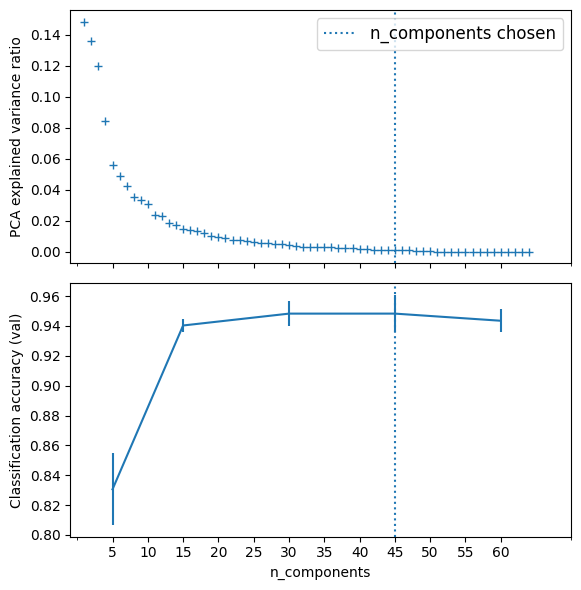

In [31]:
# التخطيط البياني
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))




# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)



ax1.axvline(45, linestyle=':')
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
ax1.set_xticks(np.arange(5, 64,5 ))
plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

# Learning Curve

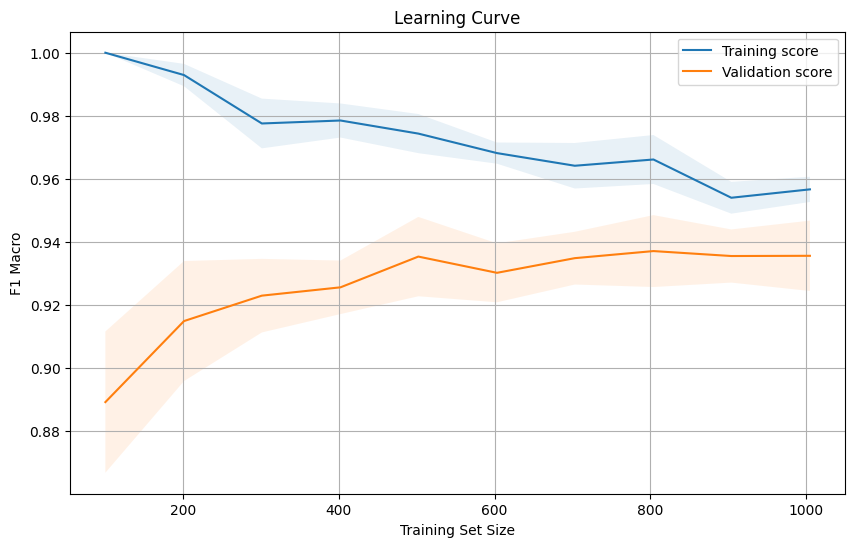

In [32]:
from plot_utils import plot_learning_curve  # Import from your library

plot_learning_curve(model, X_train, y_train, scoring="f1_macro", n_jobs=-1)

In [33]:
from sklearn.metrics._scorer import _SCORERS

# List all available scorers
list(_SCORERS.keys())

['explained_variance',
 'r2',
 'neg_max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'd2_absolute_error_score',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'positive_likelihood_ratio',
 'neg_negative_likelihood_ratio',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recal

# Prediction 

In [34]:
from sklearn import metrics
y_pred=search.predict(X_test)
f"R2  : {metrics.r2_score(y_test, y_pred)}"  

'R2  : 0.9087103600611687'

Text(0.5, 1.0, '3')

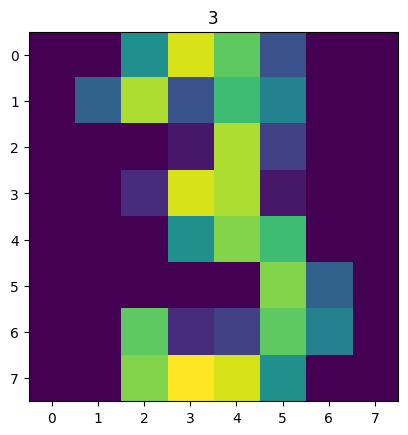

In [35]:
# رسم محتوى احدى المصفوفات
import matplotlib.pyplot as plt
# تغيير ابعاد مصفوفة السجل
plt.imshow(X_test[2].reshape(8,8))
plt.title(  y_test[2])  #  to replace with y_pred

In [36]:
y_test[2]

np.int64(3)

- X_test[4]: Selects the 5th row (index 4) of X_test. Assuming X_test is a 2D array (e.g., NumPy - array) with shape (n_samples, n_features), X_test[4] has shape (n_features,).

- .reshape(1, -1): Reshapes this single row from (n_features,) to (1, n_features), making it a 2D array with 1 sample and all features. The -1 argument tells NumPy to infer the number of columns (features) automatically.

- search.predict(): Expects a 2D array of shape (n_samples, n_features). Since (1, n_features) fits this requirement, it predicts one output (e.g., a class label for classification).



In [37]:
search.predict(X_test[2].reshape(1, -1))

array([3])

In [38]:
y_test[:5]

array([6, 9, 3, 7, 2])

In [39]:
search.predict(X_test[:5])

array([6, 9, 3, 7, 2])

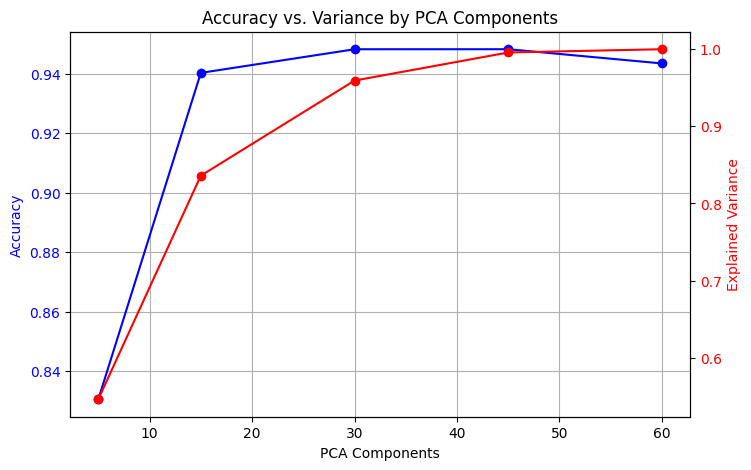

In [40]:
n_components_list = [5, 15, 30, 45, 60]

# Extract best accuracy per n_components from GridSearchCV
accuracies = [np.max(search.cv_results_['mean_test_score']
             [[p['pca__n_components'] == n for p in search.cv_results_['params']]])
             for n in n_components_list]

# Compute cumulative explained variance ratio
explained_variances = [np.sum(PCA(n).fit(X_train).explained_variance_ratio_) 
                       for n in n_components_list]

# Plot with dual axes
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(n_components_list, accuracies, 'b-o', label='Accuracy')
ax1.set_xlabel('PCA Components')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(n_components_list, explained_variances, 'r-o', label='Variance Ratio')
ax2.set_ylabel('Explained Variance', color='r')
ax2.tick_params('y', labelcolor='r')

plt.title('Accuracy vs. Variance by PCA Components')
ax1.grid(True)
plt.show()